In [1]:
!pip install git+https://gitlab.com/aadl_inha/CompAir.git

  Cloning https://gitlab.com/aadl_inha/CompAir.git to /private/var/folders/hw/1xcjmtrs1c31k9myf8c3p_ph0000gn/T/pip-req-build-pmq53p99
  Running command git clone --filter=blob:none --quiet https://gitlab.com/aadl_inha/CompAir.git /private/var/folders/hw/1xcjmtrs1c31k9myf8c3p_ph0000gn/T/pip-req-build-pmq53p99
  Resolved https://gitlab.com/aadl_inha/CompAir.git to commit 50eeeb49ae08f7b9f98967184279c2c753430c2b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [3]:
# 등엔트로피 유동 관계식
from compair import isentropic as isen
# 수직충격파 관계식
from compair import normal_shock as ns
# 경사충격파 관계식
from compair import oblique_shock as obq

import numpy as np

$\theta-\beta-M 관계식$
* $\theta = f(M, \beta)$
* scipy의 root finding을 이용하여 $f(M,\beta)-\theta=0$ 인 해를 찾음

In [4]:
# Mach 2, 파각 40도
theta = obq.theta_beta(40, 2)
print("Theta={:.3f}".format(theta))

Theta=10.623


In [5]:
# Mach 2, 쇄기각 10도
beta = obq.beta_weak(2, 10)
print("Beta={:.3f}".format(beta))

Beta=39.314


In [6]:
# Mach 2, 경사충격파가 발생할 수 있는  최대 쐐기각
theta_max = obq.theta_max(2)
print("Theta_max={:3f}".format(theta_max))

Theta_max=22.973532


/Users/hoony/pyenv/lib/python3.13/site-packages/compair/oblique_shock.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  return 2/np.tan(beta_r)*((M*np.sin(beta_r))**2 - 1)/(M**2*(gamma + np.cos(2*beta_r))+2)


Text(0, 0.5, '$\\beta$')

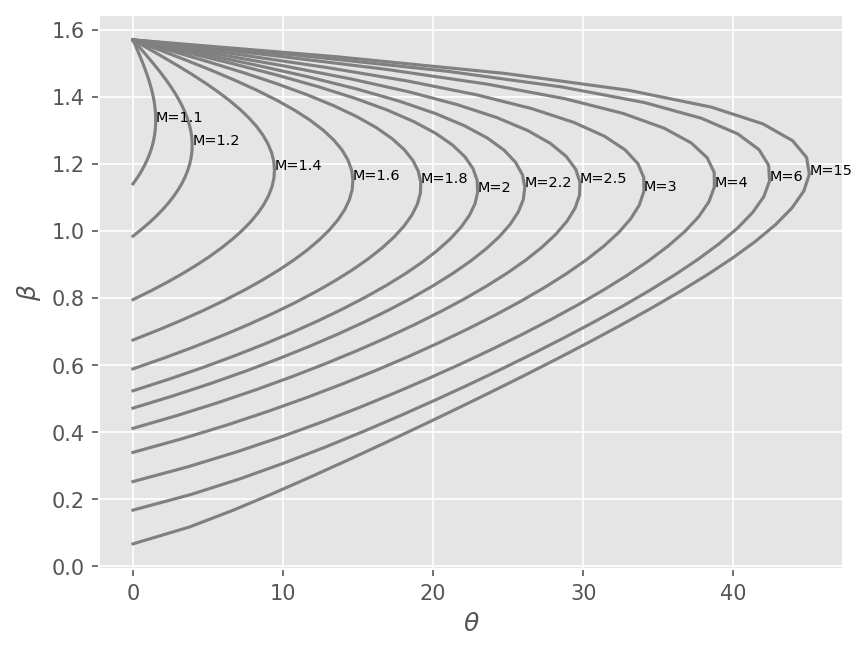

In [7]:
from scipy import optimize


def tbm_curve(M, gamma=1.4, n=31):
    # Construct equation for beta
    f = lambda x : obq.theta_beta(x, M, gamma)

    # Compute root of tbm w.r.t beta
    sol = optimize.root_scalar(f, bracket=[0, 90])
    beta_min =sol.root

    # Divide betas on (beta_min, 90)
    beta = np.linspace(beta_min, 90, n)

    # Compute thetas
    theta = obq.theta_beta(beta, M)

    return theta, np.deg2rad(beta)

# Plot for Mach numbers
for M in [1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5, 3, 4, 6, 15]:
    # Get theta-beta curve (in degree)
    theta, beta = tbm_curve(M)

    # Plot each curve
    plt.plot(theta, beta, color='gray')

    # Get maximum theta and beta
    idx = theta.argmax()
    theta_max = theta[idx]
    beta_loc = beta[idx]

    # Add text
    plt.text(theta_max, beta_loc, "M={}".format(M), fontsize='x-small')

# Add labels using Latex symbols
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\beta$")

Example 2
--------------
$M=2$, $p=1$ atm,$T=288$, $\theta=20$

In [8]:
M1, p1, t1 = 2, 1, 288
theta=20

# theta-beta-M 관계식
beta = obq.beta_weak(M1, theta)
print("beta={:.2f} @ M={}, theta={}".format(beta, M1, theta))

# 파에 수직방향 계산
Mn1 = M1*np.sin(np.deg2rad(beta))
Mn2, rho2_rho1, p2_p1, p02_p01 = ns.solve(Mn1)
t2_t1 = p2_p1 / rho2_rho1
print("Mn2={:.3f} @ Mn1={:.3f}".format(Mn2, Mn1))

# 수평방향 속도를 고려한 마하수
M2 = Mn2 / np.sin(np.deg2rad(beta - theta))
print("M2={:.3f}".format(M2))

# 압력, 온도 계산
p2 = p2_p1*p1
t2 = t2_t1*t1
print("p2={:.3f} atm, T2={:.3f} K".format(p2, t2))

# 전압력, 전온도 계산
p02 = p2*isen.p0_p(M2)
t02 = t2*isen.t0_t(M2)
print("p02={:.3f} atm, T02={:.3f} K".format(p02, t02))

beta=53.42 @ M=2, theta=20
Mn2=0.667 @ Mn1=1.606
M2=1.210
p2=2.843 atm, T2=400.951 K
p02=6.987 atm, T02=518.400 K


Example 3
---------------
$\beta$ = 30, $M_1=2.4$

In [9]:
beta =  30
M1 = 2.4

# 쇄기각 계산
theta = obq.theta_beta(beta, M1)
print("theta={:.2f} @ M={}, beta={}".format(theta, M1, beta))

# 수직방향 충격파 계산
Mn1 = M1 * np.sin(np.deg2rad(beta))
Mn2, rho2_rho1, p2_p1, p02_p01 = ns.solve(Mn1)
t2_t1 = p2_p1 / rho2_rho1
print("Mn2={:.3f} @ Mn1={:.3f}".format(Mn2, Mn1))

# 수평방향 속도를 고려한 마하수
M2 = Mn2 / np.sin(np.deg2rad(beta - theta))
print("M2={:.3f}".format(M2))

# 압력, 온도 계산
print("p2/p1={:.3f}, T2/T1={:.3f}".format(p2_p1, t2_t1))

theta=6.72 @ M=2.4, beta=30
Mn2=0.842 @ Mn1=1.200
M2=2.131
p2/p1=1.513, T2/T1=1.128


Example 4
---------------
$\beta=35$, $p_2/p_1=3$

In [10]:
from scipy.optimize import root

beta = 35
pratio = 3

# 수직 방향 마하수 x일 때 수직충격파 관계식에 의한 압력비와 pratio 차이 함수
func = lambda x : ns.solve(x)[2] - pratio

# func=0이 되는 마하수를 수치적으로 계산
Mn1 = root(func, 1.01).x[0]
print("Mn1={:.3f} @ p2/p1={}".format(Mn1, pratio))

# 수평방향 성분을 고려한 마하수 계산
M1 = Mn1 / np.sin(np.deg2rad(beta))
print("M1={:.3f}".format(M1))

Mn1=1.648 @ p2/p1=3
M1=2.872


Example 5
---------------
- Freetream $M=3$
1. After normal shock
2. Oblique shock with $\beta=40$ and normal shock

In [11]:
M = 3

# 수직 충격파에 의한 전압력 손실
pr1= ns.solve(M)[3]
print("Total Pressure Recovery : {:.3f}".format(pr1))

Total Pressure Recovery : 0.328


In [12]:
beta = 40

# 쇄기각 계산
theta = obq.theta_beta(beta, M)
print("theta={:.2f} @ M={}, beta={}".format(theta, M, beta))

# 수직방향 마하수 계산
Mn1 = M * np.sin(np.deg2rad(beta))
Mn2, rho2_rho1, p2_p1, p02_p01 = ns.solve(Mn1)
print("Mn2={:.3f} @ Mn1={:.3f}".format(Mn2, Mn1))

# 수평 성분을 고려한 마하수 계산
M2 = Mn2 / np.sin(np.deg2rad(beta - theta))
print("M2={:.3f}".format(M2))

# 경사 충격파에 의한 전압력 손실
pr12 = p02_p01
print("Total Pressure Recovery after oblique shock: {:.4f}".format(pr12))

# 수직충격파에 의한 전압력 손실
M3, _, _, p03_p02 = ns.solve(M2)
print("M3={:.3f}".format(M3))
pr22 = p03_p02
print("Total Pressure Recovery after normal shock: {:.4f}".format(pr22))

# 전압력 손실
print("Total Pressure Recovery after two shocks : {:.4f}".format(pr12*pr22))

theta=21.85 @ M=3, beta=40
Mn2=0.590 @ Mn1=1.928
M2=1.894
Total Pressure Recovery after oblique shock: 0.7542
M3=0.597
Total Pressure Recovery after normal shock: 0.7700
Total Pressure Recovery after two shocks : 0.5808


Example 6
----------
* $M_1=3.6$, $\theta=10$
* Sea level

In [13]:
from compair import atmos1976

# At sea level (h=0km)
_, p1, t1, _, _ = atmos1976.atmos1976_at(0)
print("Pressure: {} Pa".format(p1))
print("Temperature: {} K".format(t1))

Pressure: 101325.0 Pa
Temperature: 288.15 K


In [14]:
M1, theta = 3.6, 10

# theta-beta-M 관계식
beta = obq.beta_weak(M1, theta)
print("beta={:.2f} @ M={}, theta={}".format(beta, M1, theta))

# 파에 수직방향 계산
Mn1 = M1*np.sin(np.deg2rad(beta))
Mn2, rho2_rho1, p2_p1, p02_p01 = ns.solve(Mn1)
t2_t1 = p2_p1 / rho2_rho1
print("Mn2={:.3f} @ Mn1={:.3f}".format(Mn2, Mn1))

# 수평방향 속도를 고려한 마하수
M2 = Mn2 / np.sin(np.deg2rad(beta - theta))
print("M2={:.3f}".format(M2))

# 압력, 온도 계산
p2 = p2_p1*p1
t2 = t2_t1*t1
print("p2={:.3f} atm, T2={:.3f} K".format(p2, t2))

beta=23.90 @ M=3.6, theta=10
Mn2=0.716 @ Mn1=1.458
M2=2.982
p2=234558.568 atm, T2=372.505 K


In [15]:
# theta-beta-M 관계식
beta2 = obq.beta_weak(M2, theta)
print("beta={:.2f} @ M={:.3f}, theta={}".format(beta2, M2, theta))

# 파에 수직방향 계산
Mn2 = M2*np.sin(np.deg2rad(beta2))
Mn3, rho3_rho2, p3_p2, p03_p02 = ns.solve(Mn2)
t3_t2 = p3_p2 / rho3_rho2
print("Mn3={:.3f} @ Mn2={:.3f}".format(Mn3, Mn2))

# 수평방향 속도를 고려한 마하수
M3 = Mn3 / np.sin(np.deg2rad(beta2 - theta))
print("M3={:.3f}".format(M3))

# 압력, 온도 계산
p3 = p3_p2*p2
t3 = t3_t2*t2
print("p3={:.3f} atm, T3={:.3f} K".format(p3, t3))

beta=27.51 @ M=2.982, theta=10
Mn3=0.749 @ Mn2=1.378
M3=2.490
p3=480190.055 atm, T3=461.992 K


- Check Mach Reflection
  - $\theta > \theta_{\max}(M_2)$

In [16]:
def check_reflection(M1, theta):
    # theta-beta-M 관계식
    beta = obq.beta_weak(M1, theta)
    print("beta={:.2f} @ M={}, theta={}".format(beta, M1, theta))

    # 파에 수직방향 계산
    Mn1 = M1*np.sin(np.deg2rad(beta))
    Mn2, rho2_rho1, p2_p1, p02_p01 = ns.solve(Mn1)
    t2_t1 = p2_p1 / rho2_rho1
    print("Mn2={:.3f} @ Mn1={:.3f}".format(Mn2, Mn1))

    # 수평방향 속도를 고려한 마하수
    M2 = Mn2 / np.sin(np.deg2rad(beta - theta))
    print("M2={:.3f}".format(M2))

    # 압력, 온도 계산
    p2 = p2_p1*p1
    t2 = t2_t1*t1
    print("p2={:.3f} atm, T2={:.3f} K".format(p2, t2))

    # Theta max 비교
    theta_max = obq.theta_max(M2)
    if theta > theta_max:
        print("Mach Reflection, theta_max={:.3f}".format(theta_max))
    else:
        print("Regular Reflection")

In [17]:
check_reflection(2.0, 10)

beta=39.31 @ M=2.0, theta=10
Mn2=0.803 @ Mn1=1.267
M2=1.641
p2=172919.077 atm, T2=337.179 K
Regular Reflection


In [18]:
check_reflection(1.77, 10)

beta=44.92 @ M=1.77, theta=10
Mn2=0.813 @ Mn1=1.250
M2=1.420
p2=167789.743 atm, T2=334.056 K
Mach Reflection, theta_max=9.963


충격파 상호 작용 예제
-----------------
- M=10
- $\theta_2=10$, $\theta_3=20$

In [19]:
# 초기 조건
M1 = 4
theta2=10
theta3=20
rho1 = 1
p1 = 1

# 윗쪽 경사면 해석
M2, rho2_rho1, p2_p1, _, beta2 = obq.solve(M1, theta2)
rho2 = rho2_rho1*rho1
p2 = p2_p1*p1
print("Mach at 2={:.3f}".format(M2))
print("Density at 2={:.3f}".format(rho2))
print("Pressure at 2={:.3f}".format(p2))

# 아랫쪽 경사면 해석
M3, rho3_rho1, p3_p1, _, beta3 = obq.solve(M1, theta3)
rho3 = rho3_rho1*rho1
p3 = p3_p1*p1
print("Mach at 3={:.3f}".format(M3))
print("Density at 3={:.3f}".format(rho3))
print("Pressure at 3={:.3f}".format(p3))

Mach at 2=3.286
Density at 2=1.885
Pressure at 2=2.506
Mach at 3=2.569
Density at 3=2.878
Pressure at 3=5.212


In [20]:
# 미끄럼 유선 각도 예상
phi = 9.5
theta4 = theta2 + phi
theta5 = theta3 - phi

# 윗쪽 두번째 충격파 해석
M4, rho4_rho2, p4_p2, _, beta4 = obq.solve(M2, theta4)
rho4 = rho4_rho2*rho2
p4 = p4_p2*p2
print("Mach at 4={:.3f}".format(M4))
print("Density at 4={:.3f}".format(rho4))
print("Pressure at 4={:.3f}".format(p4))

# 아랫쪽 두번째 충격파 해석
M5, rho5_rho3, p5_p3, _, beta4 = obq.solve(M3, theta5)
rho5 = rho5_rho3*rho3
p5 = p5_p3*p3
print("Mach at 5={:.3f}".format(M5))
print("Density at 5={:.3f}".format(rho5))
print("Pressure at 5={:.3f}".format(p5))

Mach at 4=2.202
Density at 4=4.729
Pressure at 4=10.083
Mach at 5=2.123
Density at 5=4.590
Pressure at 5=10.136



Example 7
--------------
- $M=8$, $\beta=90, 60$

In [21]:
# Beta = 90
M = 8
pr = ns.p02_p01(M)
ds = -287*np.log(pr)
print("Total Pressure Recovery {:.2f} % Entropy increase {:.4f} J/Kg K".format(pr*100, ds))

Total Pressure Recovery 0.85 % Entropy increase 1368.7379 J/Kg K


In [22]:
# Beta = 60
M = 8
beta = 60
Mn = M*np.sin(np.deg2rad(beta))
pr = ns.p02_p01(Mn)
ds = -287*np.log(pr)
print("Total Pressure Recovery {:.2f} % Entropy increase {:.4f} J/Kg K".format(pr*100, ds))

Total Pressure Recovery 1.61 % Entropy increase 1185.7657 J/Kg K


Expansion Wave
---------------
- Prandtl Meyer Function 활용

In [23]:
from compair import prandtl_expand as expd

Example 8
----------
- $M_1=1.5$, $p_1=1$ atm, $T_1=288$ K
- $\theta = 15$ expansion

In [24]:
M1 = 1.5
p1, t1 = 1, 288
theta = 15

# Prandtl Meyer Function
nu1 = expd.prandtl_meyer(M1)
nu2 = nu1 + 15
print("Nu = {:.3f}".format(nu2))

# By code
M2 = expd.mach(M1, theta)
print("Mach 2 = {:.3f}".format(M2))

# Pressure
p2 = isen.p0_p(M1) / isen.p0_p(M2)*p1
print("Pressure at 2 : {:.3f} atm".format(p2))

# Temperature
t2 = isen.t0_t(M1) / isen.t0_t(M2)*t1
print("Temperature at 2 : {:.1f} K".format(t2))

Nu = 26.905
Mach 2 = 2.019
Pressure at 2 : 0.455 atm
Temperature at 2 : 230.0 K


Example 9
----------
* $M = 10$, $\theta=15$
* Isentropic compression vs Oblique shock compression

In [25]:
M1, theta = 10, 15
p1 = 1

# Isentropic compression
M2 = expd.mach(M1, -theta)
print('M2={:.3f}'.format(M2))

# Pressure
p2 = isen.p0_p(M1) / isen.p0_p(M2)*p1
print("Pressure at 2 : {:.3f} atm".format(p2))

M2=6.360
Pressure at 2 : 18.733 atm


In [26]:
# Oblique Shock Compression
M2, _, p2_p1, p02_p01, beta = obq.solve(M1, theta)
print('M2={:.3f}'.format(M2))

# Pressure
p2 = p2_p1*p1
print("Pressure at 2 : {:.3f} atm".format(p2))
print("Total Pressure Recovery : {:.3f}".format(p02_p01))

M2=5.279
Pressure at 2 : 13.404 atm
Total Pressure Recovery : 0.230


Example 10
-----------
* M1 = 7, $\alpha=10$
* Flat plate vs Wedge with $\delta=10$

In [27]:
# Upper surface
M1 = 7
alpha = 10

# Flat plate
# Upper surface
M2 = expd.mach(M1, alpha)
print("M2 = {:.3f}".format(M2))

p2 = isen.p0_p(M1) / isen.p0_p(M2)
print("pu = {:.3f}".format(p2))

# Lower surface
M2, _, p3_p1, _, _ = obq.solve(M1, alpha)
print("M2={:.3f}".format(M2))

p3 = p1*p3_p1
print("pl = {:.3f}".format(p3))

# Normal force coefficient
gamma = 1.4
cn = (p3 - p2) / (gamma/2*M1**2)

# Lift force
cl = cn * np.cos(np.deg2rad(alpha))
print("Lift coefficient : {:.4f}".format(cl))

M2 = 9.527
pu = 0.135
M2=5.234
pl = 4.381
Lift coefficient : 0.1219


In [28]:
# Wedge
delta = 10

# Upper surface
M2 = expd.mach(M1, alpha-delta/2)
print("M2 = {:.3f}".format(M2))

p2 = isen.p0_p(M1) / isen.p0_p(M2)
print("pu = {:.3f}".format(p2))

# Lower surface
M2, _, p3_p1, _, beta = obq.solve(M1, alpha+delta/2)
print("M2={:.3f}".format(M2))

p3 = p1*p3_p1
print("pl = {:.3f}".format(p3))

# Normal force coefficient
gamma = 1.4

cl = (p3*np.cos(np.deg2rad(15)) - p2*np.cos(np.deg2rad(5))) / np.cos(np.deg2rad(5)) / (gamma/2*M1**2)
print("Lift coefficient : {:.4f}".format(cl))

M2 = 8.085
pu = 0.396
M2=4.403
pl = 7.579
Lift coefficient : 0.2027
